In [1]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Algumas portas lógicas do IBMQ

A descrição das portas lógicas do IBMQ pode ser encontrada em https://qiskit.org/documentation/apidoc/circuit_library.html.

Um sumário de operações quânticas pode ser encontrado em https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html.

## Sobre kets

### Base computacional
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

### Estado geral
$$|\psi\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix} = c_{0}\begin{bmatrix} 1 \\ 0 \end{bmatrix}+c_{1}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = c_{0}|0\rangle+c_{1}|1\rangle$$ com $c_{j}\in\mathbb{C}$

### Produto tensorial
$$|\psi\rangle\otimes|\psi'\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix}\otimes\begin{bmatrix} c_{0}' \\ c_{1}' \end{bmatrix} = \begin{bmatrix} c_{0}c_{0}' \\ c_{0}c_{1}' \\ c_{1}c_{0}' \\ c_{1}c_{1}' \end{bmatrix}$$

## Portas lógicas de 1 qubit

### NOT ou X
$$X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$$
Assim $X|0\rangle=|1\rangle$ e $X|1\rangle=|0\rangle$

### Y
$$Y=\begin{bmatrix}0&-i\\i&0\end{bmatrix}$$
Assim $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$

### Z
$$Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$$
Assim $Z|0\rangle=|0\rangle$ e $Z|1\rangle=-|1\rangle$

### Porta de Hadamard
Muda da base $\{|0\rangle,|1\rangle\}$ para a base $\{|+\rangle,|-\rangle\}$, em que $|\pm\rangle=(|0\rangle\pm|1\rangle)/\sqrt{2}$, e vice-versa:
$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$

### Porta $U3$ (rotação geral)
\begin{align}
U3(\theta,\phi,\lambda) & = RZ(\phi)RX(-\pi/2)RZ(\theta)RX(\pi/2)RZ(\lambda) \\
& = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}
\end{align}
Assim, e.g.,
\begin{align}
& U_{3}|0\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& U_{3}|1\rangle = -e^{i\lambda}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle.
\end{align}

### Porta $S$ ($S^{\dagger}$)
Essa porta lógica é representada matricialmente por
\begin{align}
S = \begin{bmatrix}1&0\\0&i\end{bmatrix}\ \therefore\ S^{\dagger} = \begin{bmatrix}1&0\\0&-i\end{bmatrix},
\end{align}
e induz uma fase $\pi/2$ no estado $|1\rangle$:
\begin{align}
S|0\rangle=|0\rangle, S|1\rangle=i|1\rangle = e^{i\pi/2}|1\rangle.
\end{align}

### Porta de fase $P$
Essa porta lógica é representada matricialmente por
\begin{align}
P(\theta) = \begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}
\end{align}
e induz uma fase $\theta$ no estado $|1\rangle$:
\begin{align}
P(\theta)|0\rangle=|0\rangle, P(\theta)|1\rangle = e^{i\theta}|1\rangle.
\end{align}

## Medidas

### Medidas na base $\{|0\rangle,|1\rangle\}$
Medidas nessa base, usualmente chamada de base $Z$, são implementadas diretamente no IBMQ.

### Medidas na base $\{|+\rangle,|-\rangle\}$
Notamos que
\begin{align}
Pr(+|\psi) = |\langle +|\psi\rangle|^{2} \equiv |\langle 0|H|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
Vemos facilmente que o análog vale para $Pr(-|\psi)=Pr(1|\psi')$, com $$|\psi'\rangle=H|\psi\rangle.$$
Portanto, medidas na base $\{|0\rangle,|1\rangle\}$, usualmente chamada de base $X$, são implementadas aplicando-se uma porta de Hadamard e subsequentemente fzendo-se medida na base $Z$.

### Medidas na base $\{|\oplus\rangle,|\ominus\rangle\}$
Temos que
\begin{align}
& S|+\rangle = (S|0\rangle+S|1\rangle)/\sqrt{2} = (|0\rangle+i|1\rangle)/\sqrt{2} = |\oplus\rangle \ \therefore \langle\oplus|=\langle+|S^{\dagger}=\langle 0|HS^{\dagger}, \\
& S|-\rangle = (S|0\rangle-S|1\rangle)/\sqrt{2} = (|0\rangle-i|1\rangle)/\sqrt{2} = |\ominus\rangle \ \therefore \langle\ominus|=\langle-|S^{\dagger}=\langle 1|HS^{\dagger}.
\end{align}
Vem assim que
\begin{align}
Pr(\oplus|\psi) = |\langle\oplus|\psi\rangle|^{2} \equiv |\langle 0|HS^{\dagger}|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
com 
$$|\psi'\rangle = HS^{\dagger}|\psi\rangle.$$
Analogamente, $Pr(\ominus|\psi)=Pr(1|\psi')$.

## Portas lógicas de 2 ou mais qubits

### Control-Not (CNOT=CX)
\begin{align}
CNOT_{c\rightarrow t} = |0\rangle\langle 0|\otimes \mathbb{I} +  |1\rangle\langle 1|\otimes X
\end{align}
Ação da CNOT_12
\begin{align}
& CNOT_{c\rightarrow t}|0\rangle\otimes|0\rangle = |0\rangle\langle 0||0\rangle\otimes \mathbb{I}|0\rangle +  |1\rangle\langle 1||0\rangle\otimes X|0\rangle = |0\rangle\otimes|0\rangle, \\
& CNOT_{c\rightarrow t}|0\rangle\otimes|1\rangle = |0\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|0\rangle = |1\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|1\rangle = |1\rangle\otimes|0\rangle.
\end{align}
Ou seja,
$$CNOT_{c\rightarrow t}|j\rangle\otimes|k\rangle = |j\rangle\otimes|j\oplus k\rangle$$

__Exercício:__ Descreva explicitamente a ação da CNOT na base computacional.

In [6]:
CX_12 = tp(proj(cb(2,0)),id(2)) + tp(proj(cb(2,1)),pauli(1)); CX_12

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  1  0⎦

### SWAP (troca)

$$SWAP = CNOT_{12}\ CNOT_{21}\ CNOT_{12}$$

#### Exemplo
Considera $|\Psi\rangle = (a_{0}|0\rangle+a_{1}|1\rangle)\otimes(b_{0}|0\rangle+b_{1}|1\rangle) = a_{0}b_{0}|00\rangle + a_{0}b_{1}|01\rangle + a_{1}b_{0}|10\rangle + a_{1}b_{1}|11\rangle$. Teremos
\begin{align}
SWAP|\Psi\rangle & = a_{0}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|10\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|11\rangle \\
& = a_{0}b_{0}CNOT_{12}\ CNOT_{21}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}|11\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}|10\rangle \\
& = a_{0}b_{0}CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}|11\rangle + a_{1}b_{0}CNOT_{12}|01\rangle + a_{1}b_{1}CNOT_{12}|10\rangle \\
& = a_{0}b_{0}|00\rangle + a_{0}b_{1}|10\rangle + a_{1}b_{0}|01\rangle + a_{1}b_{1}|11\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{0}|0\rangle + (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{1}|1\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes(a_{0}|0\rangle + a_{1}|1\rangle).
\end{align}

In [7]:
CX_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(1),proj(cb(2,1))); CX_21

⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  1  0  0⎦

In [8]:
SWAP = CX_12*CX_21*CX_12; SWAP

⎡1  0  0  0⎤
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  0  1⎦

### Z controlada
$$C_{Z}^{1\rightarrow 2} = |0\rangle\langle 0|\otimes \mathbb{I} +  |1\rangle\langle 1|\otimes Z$$
Pode-se verificar que $C_{Z}^{1\rightarrow 2}=C_{Z}^{2\rightarrow 1}=:C_{Z}.$

Lembrado, $X$ troca estados da base computacional e $Z$ faz isso para a base $\{|+\rangle,|-\rangle\}$. Podemos assim obter a Cx da Cz e vice versa. Por exemplo, se mudamos para a base $\{|+\rangle,|-\rangle\}$, aplicamos Cz e voltamos para a base computacional, isso será equivalente a uma CNOT na base padrão:
$$C_{X}^{1\rightarrow 2} = (I\otimes H)C_{Z}^{1\rightarrow 2}(I\otimes H).$$
Do mesmo modo
$$C_{Z} = (I\otimes H)C_{X}^{1\rightarrow 2}(I\otimes H).$$

In [9]:
Cz = tp(proj(cb(2,0)), id(2)) + tp(proj(cb(2,1)), pauli(3)); Cz_12 = Cz
Cz_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(3),proj(cb(2,1)))
Cz_12, Cz_21

⎛⎡1  0  0  0 ⎤  ⎡1  0  0  0 ⎤⎞
⎜⎢           ⎥  ⎢           ⎥⎟
⎜⎢0  1  0  0 ⎥  ⎢0  1  0  0 ⎥⎟
⎜⎢           ⎥, ⎢           ⎥⎟
⎜⎢0  0  1  0 ⎥  ⎢0  0  1  0 ⎥⎟
⎜⎢           ⎥  ⎢           ⎥⎟
⎝⎣0  0  0  -1⎦  ⎣0  0  0  -1⎦⎠

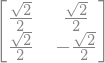

In [6]:
H = (1/sqrt(2))*Matrix([[1,1],[1,-1]]); H

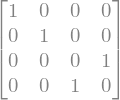

In [10]:
Cx12 = tp(id(2),H)*Cz*tp(id(2),H); Cx12

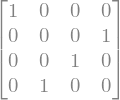

In [9]:
Cx21 = tp(H,id(2))*Cz*tp(H,id(2)); Cx21

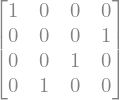

In [13]:
CX_21 = tp(id(2),proj(cb(2,0))) + tp(pauli(1),proj(cb(2,1))); CX_21

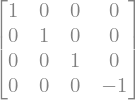

In [14]:
Cz12 = tp(id(2),H)*Cx12*tp(id(2),H); Cz12

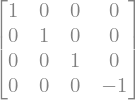

In [15]:
Cz21 = tp(id(2),H)*Cx21*tp(id(2),H); Cz12

U controlada
$$CU(\theta,\phi,\lambda,\gamma) = |0\rangle\langle 0 |\otimes I + |1\rangle\langle 1|\otimes e^{i\gamma}U(\theta,\phi,\lambda).$$

Porta de Toffolli
$$C_{CX} = |0\rangle\langle 0|\otimes I_{4} + |1\rangle\langle 1|\otimes C_{x}$$

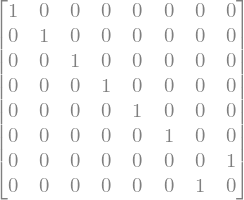

In [12]:
CCX = tp(proj(cb(2,0)),id(4)) + tp(proj(cb(2,1)),Cx12); CCX

### Multi-controlled gates

In [2]:
def qc_ry(th):
    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr, name = 'RY')
    qc.ry(th, 0)
    return qc

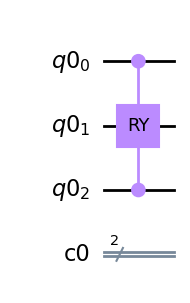

In [3]:
from qiskit import *
qr = QuantumRegister(3) 
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc_ry_ = qc_ry(math.pi)
ccry = qc_ry_.to_gate().control(2)
qc.append(ccry, [2, 0, 1])
qc.draw(output = 'mpl')

# Barreiras
Seguindo (https://youtu.be/CdoCPz6TC9k), considere o circuito abaixo.

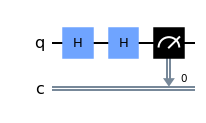

In [6]:
from qiskit import *
qc = QuantumCircuit(1, 1); qc.h([0]); qc.h([0]); qc.measure([0], [0]); qc.draw(output = 'mpl')

Quando este circuito for enviado para ser executado no chip real, o transpiler notará que $HH=I$ e simplesmente não aplicará nenhuma operação. Ou seja, esse circuito será equivalente a preparar o estado $|0\rangle$ e medir na base computacional. Mas isso, na prática, é bem diferente que aplicar duas portas de Hadamard em sequência, por causa dos erros inevitáveis associados. Para obrigar transpiler a excecutar as portas de Hadamard, usamos a barrier() entre essas portas, como mostrado no circuito abaixo.

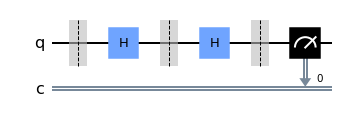

In [4]:
qc = QuantumCircuit(1, 1); qc.barrier(); qc.h([0]); qc.barrier(); qc.h([0]); qc.barrier(); qc.measure([0], [0])
qc.draw(output = 'mpl')

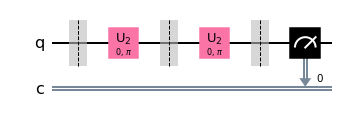

In [5]:
qc.decompose().draw(output = 'mpl')

Um exemplo prático onde a função barrier é necessária é na estimativa do tempo de decaimento, $T_{1}$. Consideremos o circuito quântico abaixo.

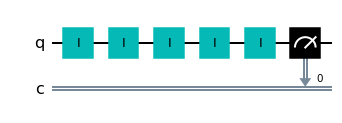

In [12]:
qc = QuantumCircuit(1, 1)
N = 5
for j in range(0, N):
    qc.id([0])
qc.measure([0], [0])
qc.draw(output = 'mpl')

In [15]:
nshots = 8192
qiskit.IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_bogota')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import backend_overview, backend_monitor
from qiskit.tools.visualization import plot_histogram

ibmqfactory.load_account:WARNING:2022-02-04 15:22:37,730: Credentials are already in use. The existing account in the session will be replaced.



Para esse circuito quântico, o transpiler simplemente ignorará as operações $I$, preparando o estado $|0\rangle$ e medindo na base computacional. Para obrigar o transpiler a aplicar $I$, que é equivalente a esperar um certo tempo $t_{I}$, devemos usar a função barrier, como exemplificado no circuito abaixo.

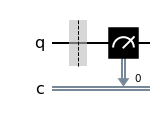

In [22]:
qc = QuantumCircuit(1, 1)
N = 0
for j in range(0, N):
    qc.barrier(); qc.id([0])
qc.barrier(); qc.measure([0], [0])
qc.draw(output = 'mpl')

61fd6f36feb3c9e2a743f8b0
Job Status: job has successfully run


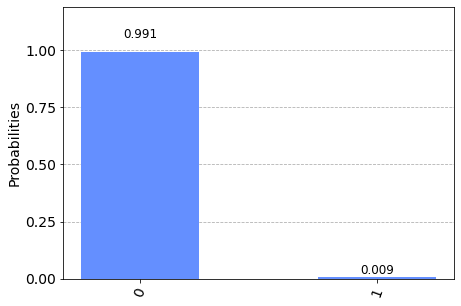

In [18]:
job_exp = execute(qc, backend = device, shots = nshots)
print(job_exp.job_id()); job_monitor(job_exp)
plot_histogram(job_exp.result().get_counts(qc))

In [32]:
qc = QuantumCircuit(1, 1)
N = 10000
for j in range(0, N):
    qc.barrier(); qc.id([0])
qc.barrier(); qc.measure([0], [0]);
#qc.draw(output = 'mpl')

61fd70e36d6faca87435e57b
Job Status: job has successfully run


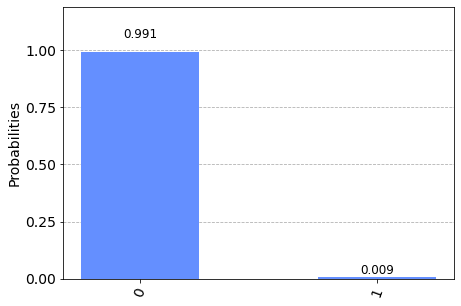

In [33]:
job_exp = execute(qc, backend = device, shots = nshots)
print(job_exp.job_id()); job_monitor(job_exp)
plot_histogram(job_exp.result().get_counts(qc))

Depois de fazer alguns testes, vemos que o tempo de decaimento é
$$t_{d} \approx x t_{I}.$$

__OBS.__ De qualquer forma, mesmo não verificando o que está apresentado no vídeo, vale a pena tirar todas as barreiras dos nossos circuitos antes de mandá-los para execução no chip real. Assim não corremos o risco de, mesmo podendo, o transpiler não otimizar nosso curcuito quando possível.

# Reset
A função reset (https://youtu.be/mFxtSlnZcM8) pode ser utilizada para colocar o estado de um qubit de volta no estado $|0\rangle$, mesmo no meio da execução de um circuito. Como isso é feito em toda preparação do estado inicial dos qubits, se espera que essa seja um operação feita como pouco erro, relativo às outras operações.

Para ver uma situação onde a função reset pode ser útil para diminuir o número de qubits necessários, considere o exemplo do circuit abaixo.

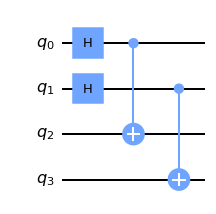

In [36]:
qc = QuantumCircuit(4); qc.h([0]); qc.cx([0], [2]); qc.h([1]); qc.cx([1], [3]); qc.draw(output = 'mpl')

Usando reset, podemos implementar essa mesmo operação nos qubits 2 e 3 mas usando um qubit auxiliar a menos, como exemplificado no circuit abaixo.

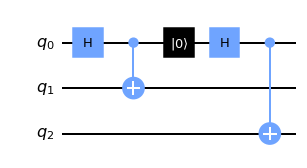

In [40]:
qc = QuantumCircuit(3); qc.h([0]); qc.cx([0], [1]); qc.reset([0]); qc.h([0]); qc.cx([0], [2])
qc.draw(output = 'mpl')